# The prior_comparison plot in the paper.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import scipy.stats as sps
import starspot as ss

plotpar = {'axes.labelsize': 25,
           'font.size': 12,
           'legend.fontsize': 15,
           'xtick.labelsize': 15,
           'ytick.labelsize': 15,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
# df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")
df = pd.read_csv("../kepler_kinematics/data.csv")

Load the results files.

In [4]:
# all_ = pd.read_csv("../data/all_kepler_all.csv")
# faint = pd.read_csv("../data/all_kepler_faint.csv")
# bright = pd.read_csv("../data/all_kepler_bright.csv")
all_ = pd.read_csv("../data/edr3_all.csv")
faint = pd.read_csv("../data/edr3_faint.csv")
bright = pd.read_csv("../data/edr3_bright.csv")

Merge the results file and the data file.

In [5]:
fdf = pd.merge(df, faint, on="kepid", how="right")
bdf = pd.merge(df, bright, on="kepid", how="right")
adf = pd.merge(df, all_, on="kepid", how="right")

print(np.shape(fdf), np.shape(bdf), np.shape(adf))

(4991, 210) (5000, 210) (5000, 210)


Define KDE funciton.

In [6]:
def kde(v, xlim):
    kernel = sps.gaussian_kde(v)
    xs = np.linspace(xlim[0], xlim[1], 100)
    return xs, kernel(xs)

Plot prior comparison

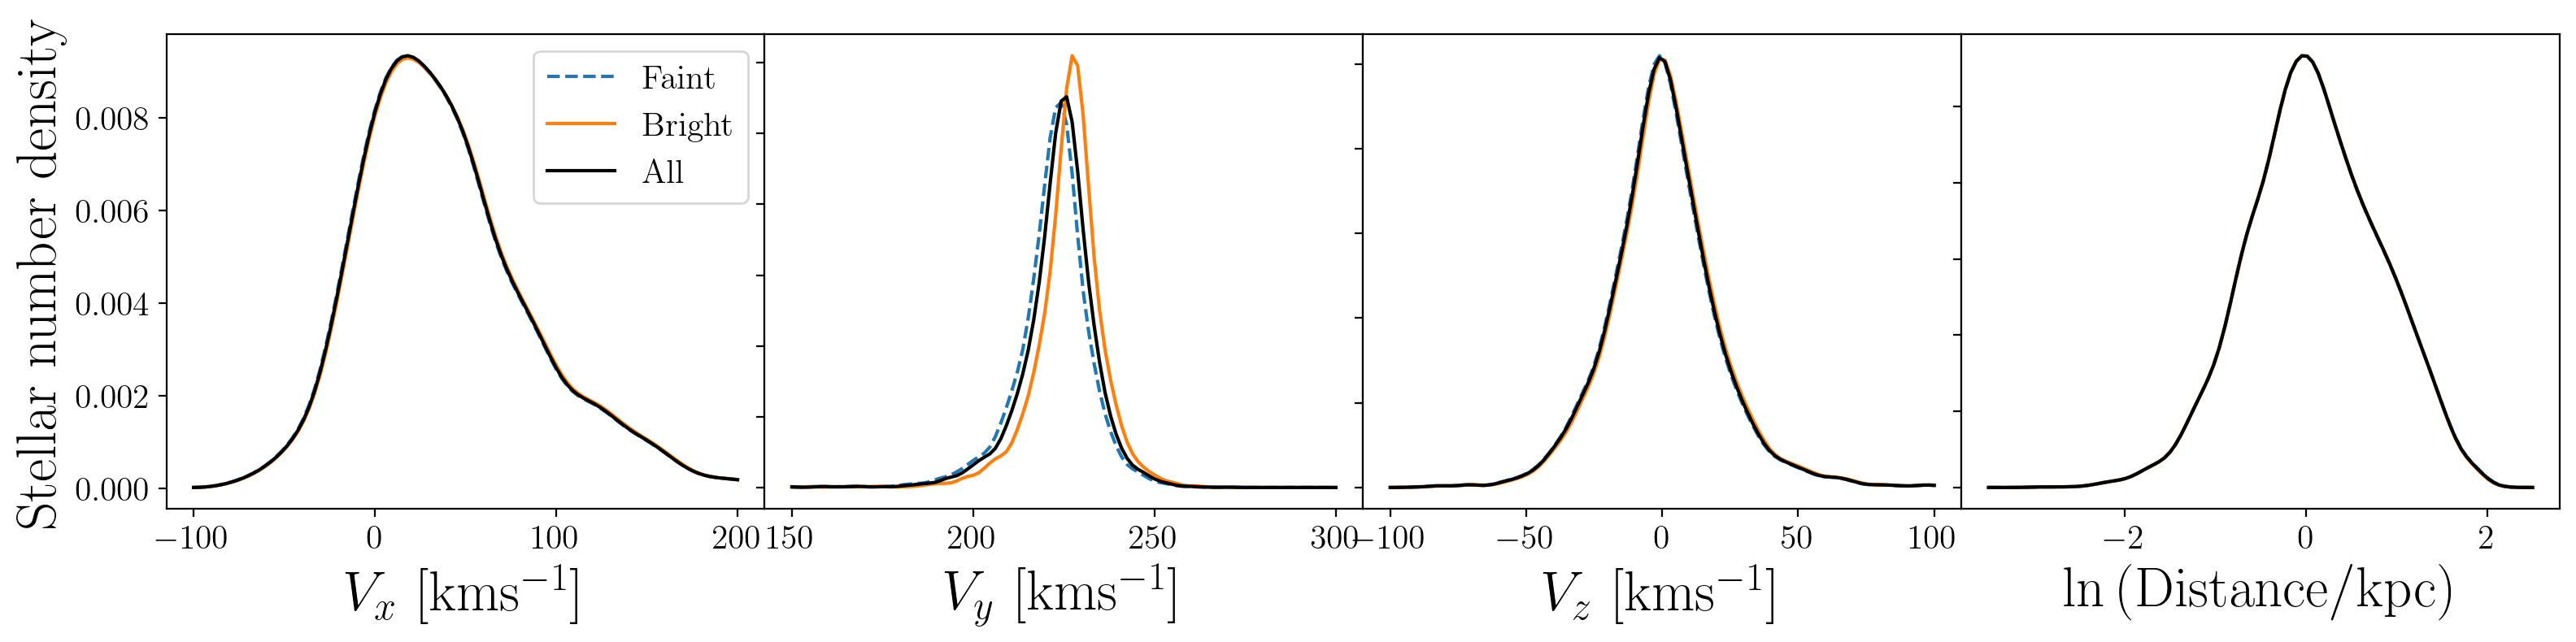

In [7]:
n = 20

fig = plt.figure(figsize=(16, 4), dpi=200)

ax0 = fig.add_subplot(141)
xs, k = kde(fdf.vx_inferred.values, [-100, 200])
ax0.plot(xs, k, color="C0", ls="--", label="$\mathrm{Faint}$");
xs, k = kde(bdf.vx_inferred.values, [-100, 200])
ax0.plot(xs, k, color="C1", label="$\mathrm{Bright}$");
xs, k = kde(adf.vx_inferred.values, [-100, 200])
ax0.plot(xs, k, color="k", label="$\mathrm{All}$");
ax0.set_xlabel("$V_x~\mathrm{[kms^{-1}]}$")
ax0.set_ylabel("$\mathrm{Stellar~number~density}$")
ax0.legend();

ax1 = fig.add_subplot(142)
xs, k = kde(fdf.vy_inferred.values, [150, 300])
ax1.plot(xs, k, color="C0", ls="--", label="$\mathrm{Faint~prior}$");
xs, k = kde(bdf.vy_inferred.values, [150, 300])
ax1.plot(xs, k, color="C1", label="$\mathrm{Bright~prior}$");
xs, k = kde(adf.vy_inferred.values, [150, 300])
ax1.plot(xs, k, color="k", label="$\mathrm{All~prior}$");
ax1.set_xlabel("$V_y~\mathrm{[kms^{-1}]}$")
ax1.set_yticklabels([])

ax2 = fig.add_subplot(143)
xs, k = kde(fdf.vz_inferred.values, [-100, 100])
ax2.plot(xs, k, color="C0", ls="--", label="$\mathrm{Faint~prior}$");
xs, k = kde(bdf.vz_inferred.values, [-100, 100])
ax2.plot(xs, k, color="C1", label="$\mathrm{Bright~prior}$");
xs, k = kde(adf.vz_inferred.values, [-100, 100])
ax2.plot(xs, k, color="k", label="$\mathrm{All~prior}$");
ax2.set_xlabel("$V_z~\mathrm{[kms^{-1}]}$")
ax2.set_yticklabels([])

ax3 = fig.add_subplot(144)
xs, k = kde(fdf.lndistance_inferred.values, [-3.5, 2.5])
ax3.plot(xs, k, color="C0", ls="--", label="$\mathrm{Faint~prior}$");
xs, k = kde(bdf.lndistance_inferred.values, [-3.5, 2.5])
ax3.plot(xs, k, color="C1", label="$\mathrm{Bright~prior}$");
xs, k = kde(adf.lndistance_inferred.values, [-3.5, 2.5])
ax3.plot(xs, k, color="k", label="$\mathrm{All~prior}$");
ax3.set_xlabel("$\ln\mathrm{(Distance/kpc)}$")
ax3.set_yticklabels([])

plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig("../plots/prior_comparison")
plt.savefig("../paper/prior_comparison.pdf")